In [1]:
import random
import pandas as pd
import numpy as np
import os
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit, KFold, TimeSeriesSplit
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')
#순서 = [상용,아파트,할인마트(87~92),호텔및리조트(93~98)]
index = [54,65,87,88,89,90,91,92,93,94,95,98]

def plot(df):
    # 데이터프레임이 df라고 가정하고, 'power_consumption'이라는 열이 있다고 가정합니다.
    plt.figure(figsize=(100,10))  # 그래프의 크기를 설정합니다.
    #plt.scatter(df.index, df['power_consumption'])  # scatter plot을 그립니다.
    plt.plot(df.index, df['power_consumption'])
    plt.xlabel('Index')  # x축 레이블을 설정합니다.
    plt.ylabel('Power Consumption')  # y축 레이블을 설정합니다.
    plt.title('Scatter plot of Power Consumption')  # 그래프의 제목을 설정합니다.
    plt.show()  # 그래프를 출력합니다.

# custom objective function for forcing model not to underestimate
def weighted_mse(alpha = 1):
    def weighted_mse_fixed(label, pred):
        residual = (label - pred).astype("float")
        grad = np.where(residual>0, -2*alpha*residual, -2*residual)
        hess = np.where(residual>0, 2*alpha, 2.0)
        return grad, hess
    return weighted_mse_fixed

 #점수 측정을 위한 코드
def SMAPE(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def FFT(df, col, topn=2):
    fft = np.fft.fft(df[col])
    fft[topn:-topn] = 0
    ifft = np.fft.ifft(fft)
    return np.real(ifft)

#stock['FFT(30)'] = FFT(stock, 'Close', 30)

hyperparameters = pd.DataFrame(columns = ['n_estimators', 'eta', 'min_child_weight','max_depth', 'colsample_bytree', 'subsample','alpha','best_it'])
origin_pras = pd.read_csv('./parameters\hyperparameter_xgb_wsw_0730.csv').drop(columns=['Unnamed: 0'])

__________Buildding Number:54 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 57.49032683543423
54_____Best Iteration_____ 368 _____SMAPE Score________ 22.904607094104662
54_____Best Alpha_____ 75 _____SMAPE Score_____ 22.759006227432774
54_____SMAPE Score_____ 22.759006227432774


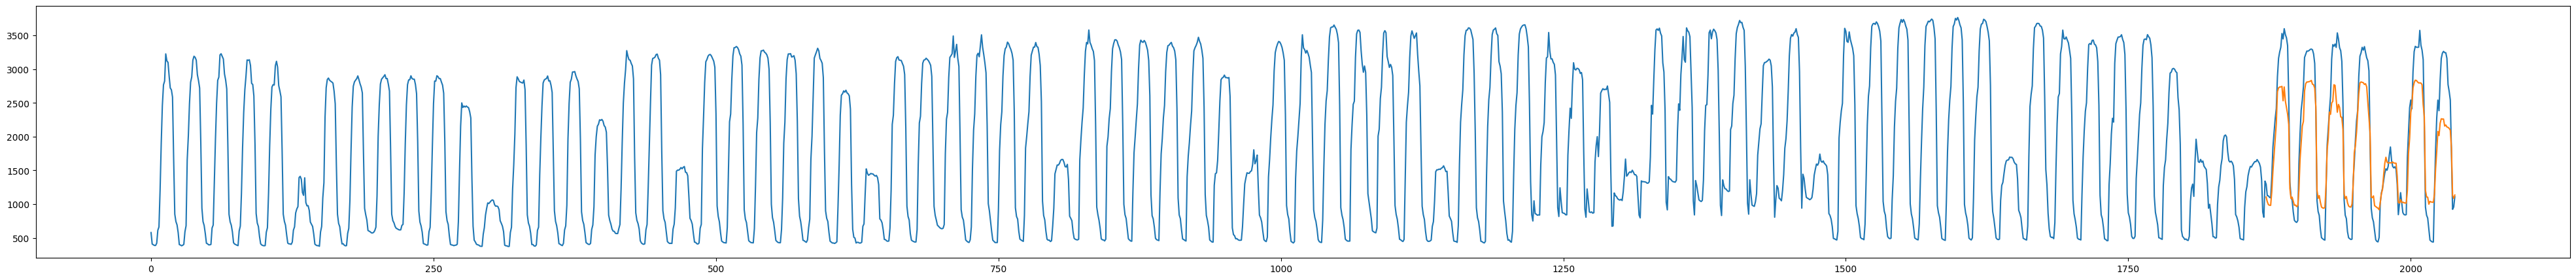

__________Buildding Number:65 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 38.651831313786275
65_____Best Iteration_____ 267 _____SMAPE Score________ 7.586822345987869
65_____Best Alpha_____ 100 _____SMAPE Score_____ 7.586822345987869
65_____SMAPE Score_____ 7.586822345987869


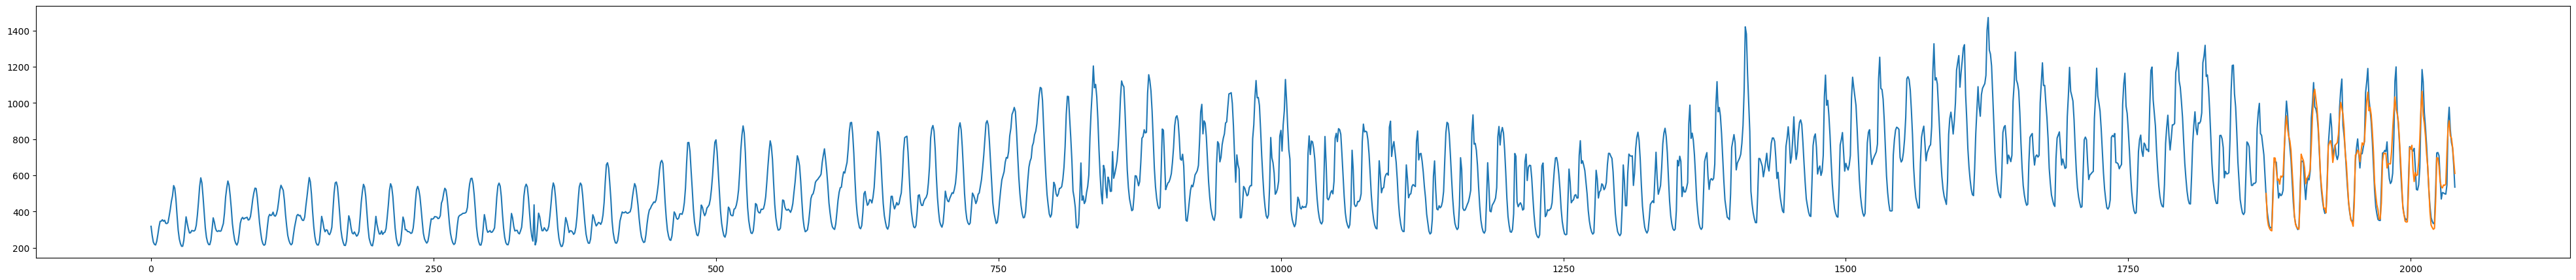

__________Buildding Number:87 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 11, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 46.29666996978218
87_____Best Iteration_____ 371 _____SMAPE Score________ 7.836526134491935
87_____Best Alpha_____ 100 _____SMAPE Score_____ 7.836526134491935
87_____SMAPE Score_____ 7.836526134491935


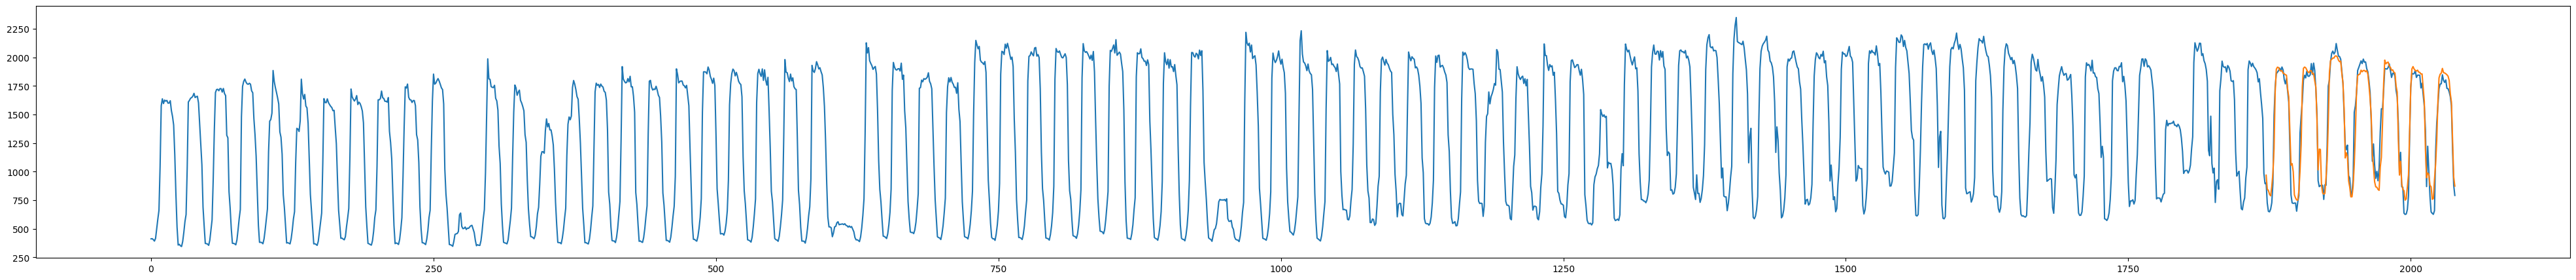

__________Buildding Number:88 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 11, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 49.165641425149445
88_____Best Iteration_____ 442 _____SMAPE Score________ 9.001464873363709
88_____Best Alpha_____ 5 _____SMAPE Score_____ 8.925749897565717
88_____SMAPE Score_____ 8.925749897565717


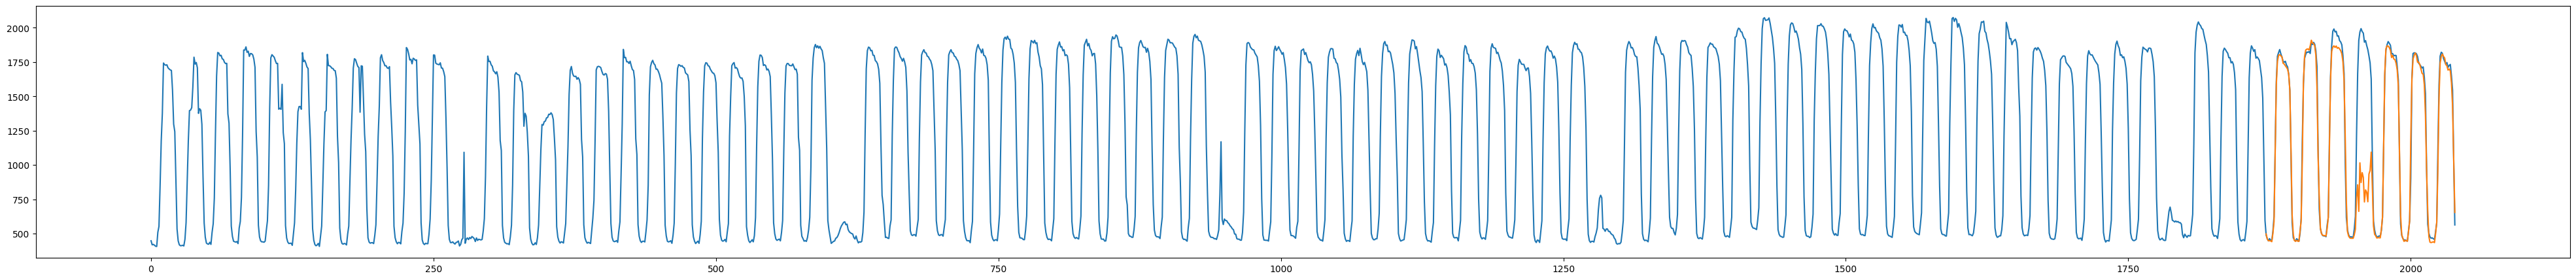

__________Buildding Number:89 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 49.268303558961485
89_____Best Iteration_____ 315 _____SMAPE Score________ 8.039775957223249
89_____Best Alpha_____ 100 _____SMAPE Score_____ 8.039775957223249
89_____SMAPE Score_____ 8.039775957223249


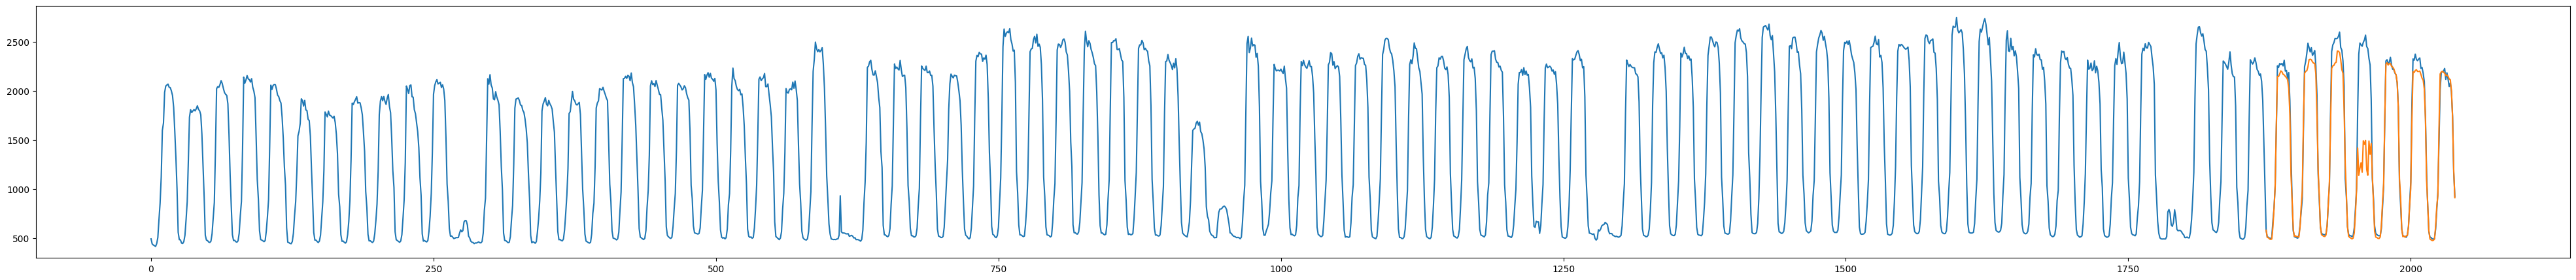

__________Buildding Number:90 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 11, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 50.35305655186872
90_____Best Iteration_____ 265 _____SMAPE Score________ 8.747975284172353
90_____Best Alpha_____ 10 _____SMAPE Score_____ 8.590009296501355
90_____SMAPE Score_____ 8.590009296501355


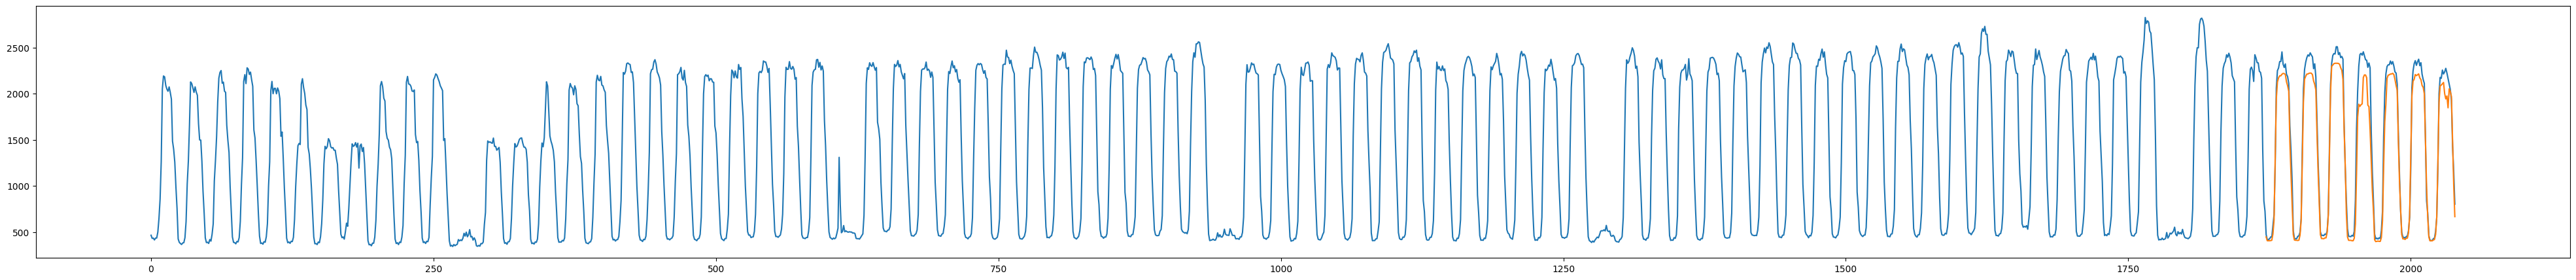

__________Buildding Number:91 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 11, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 48.28717577224376
91_____Best Iteration_____ 387 _____SMAPE Score________ 11.7152968087615
91_____Best Alpha_____ 10 _____SMAPE Score_____ 11.534610804899241
91_____SMAPE Score_____ 11.534610804899241


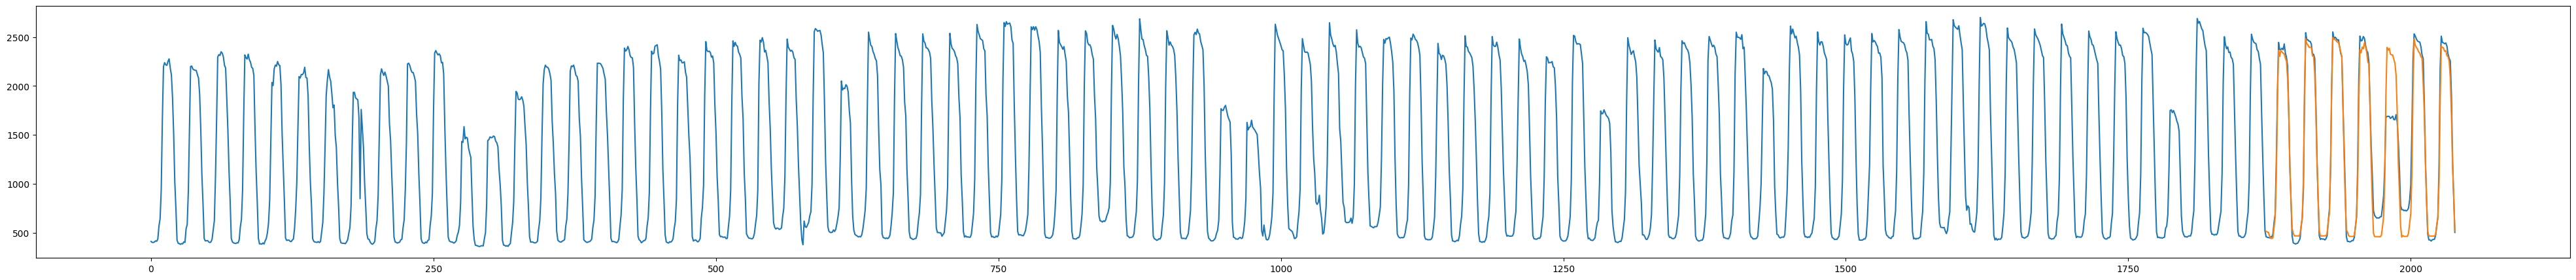

__________Buildding Number:92 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 45.72850075383035
92_____Best Iteration_____ 461 _____SMAPE Score________ 7.157376858761804
92_____Best Alpha_____ 3 _____SMAPE Score_____ 6.840558584891194
92_____SMAPE Score_____ 6.840558584891194


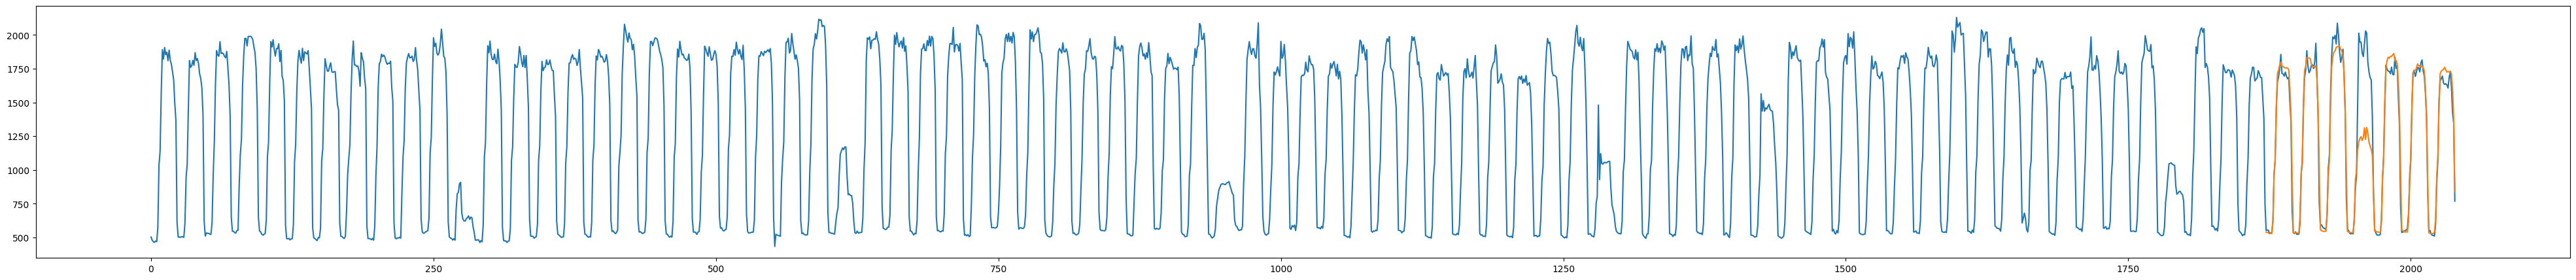

__________Buildding Number:93 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 43.19432668504556
93_____Best Iteration_____ 2337 _____SMAPE Score________ 6.186718532224151
93_____Best Alpha_____ 25 _____SMAPE Score_____ 6.115726698673668
93_____SMAPE Score_____ 6.115726698673668


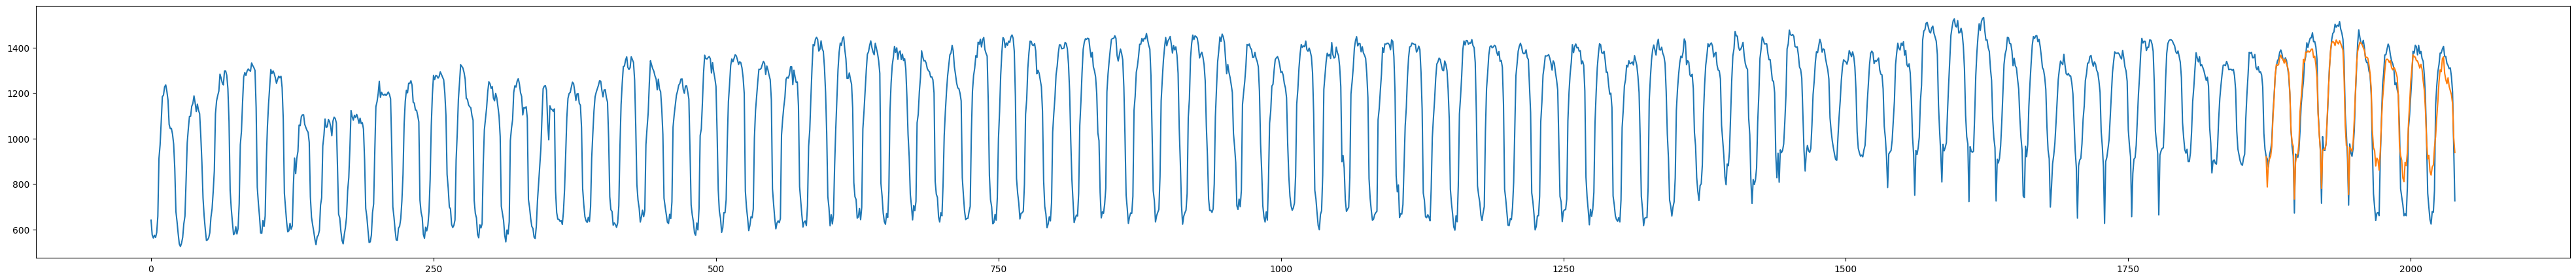

__________Buildding Number:94 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 7, 'min_child_weight': 9, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 46.437148561795546
94_____Best Iteration_____ 520 _____SMAPE Score________ 6.196665522970468
94_____Best Alpha_____ 10 _____SMAPE Score_____ 6.1069835145879
94_____SMAPE Score_____ 6.1069835145879


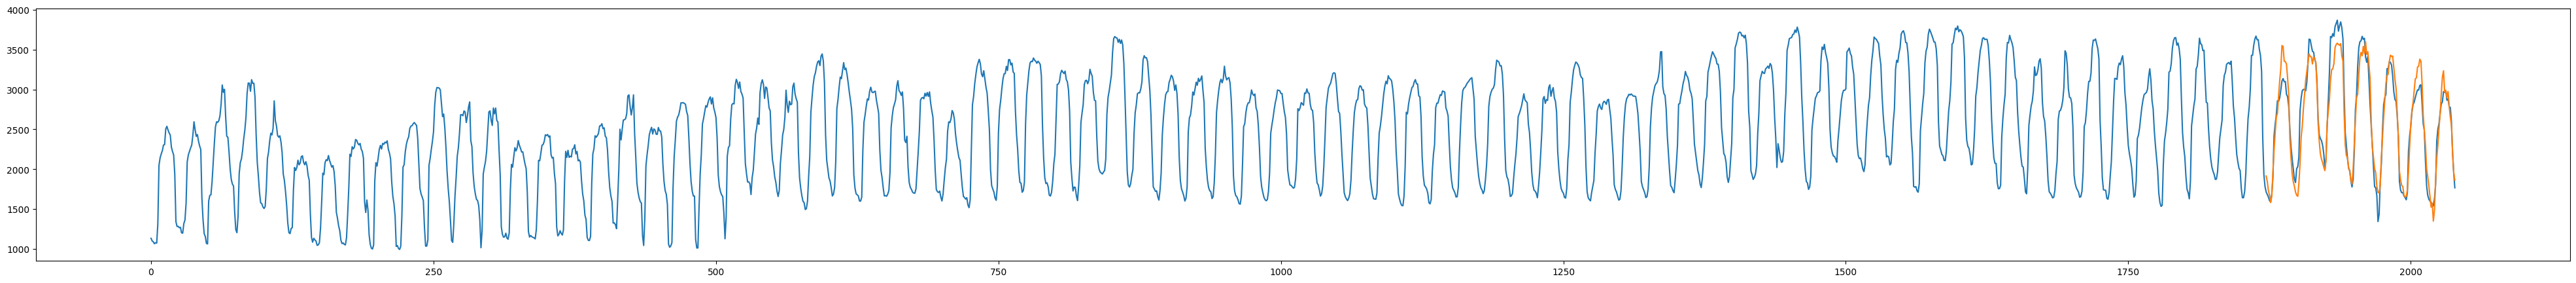

__________Buildding Number:95 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 11, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 30.14904653107021
95_____Best Iteration_____ 204 _____SMAPE Score________ 13.978796744699483
95_____Best Alpha_____ 1 _____SMAPE Score_____ 13.514569761048032
95_____SMAPE Score_____ 13.514569761048032


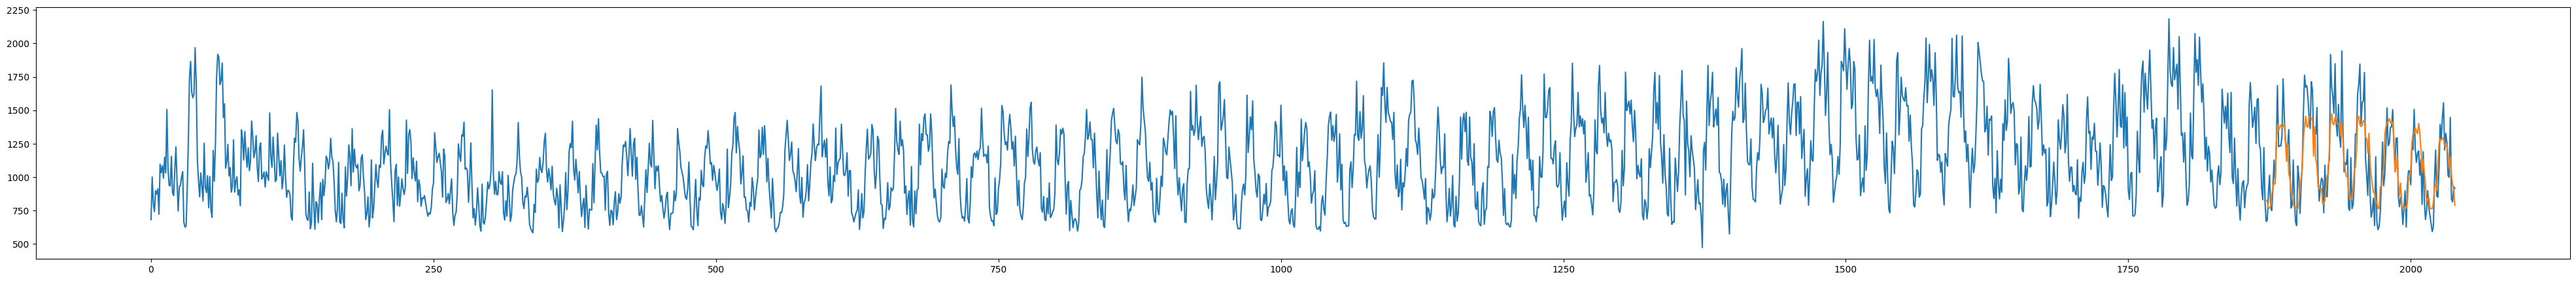

__________Buildding Number:98 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 36.77885434908506
98_____Best Iteration_____ 301 _____SMAPE Score________ 13.176130490273508
98_____Best Alpha_____ 1 _____SMAPE Score_____ 12.398752555949581
98_____SMAPE Score_____ 12.398752555949581


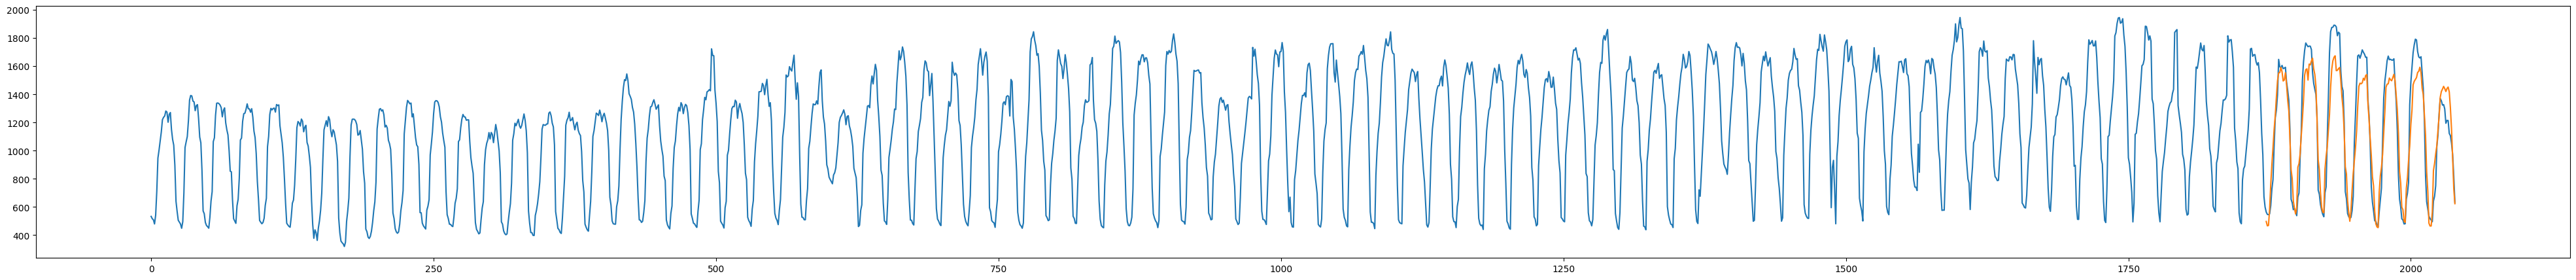

In [8]:
#전처리 추가로 안함
for i in index:
	#불러오고 나누기
	plot_y = train_df.loc[train_df.building_number == i ].reset_index().drop(columns=['index'])
	train = hyper_train.loc[hyper_train.building_number == i].reset_index().drop(columns=['index'])
	vaild = hyper_valid.loc[hyper_valid.building_number == i].reset_index().drop(columns=['index'])
	#하이퍼 파라미터 튜닝 method 1
	#leaf method
	print(f"__________Buildding Number:{i} Hyperparameter Tuning__________")
	preds = np.array([])
	smape_score = make_scorer(SMAPE, greater_is_better=False)
	grid = {'n_estimators' : [100], 'eta' : [0.01], 'min_child_weight' : np.arange(1, 12, 1),
			'max_depth' : np.arange(3,10,1) , 'colsample_bytree' :[0.8, 0.9],
			'subsample' : [0.8, 0.9]} 

	x = train.drop(columns=['power_consumption'])
	y = train['power_consumption']

	#fit
	gcv = GridSearchCV(estimator = XGBRegressor(seed=42,tree_method="hist", gpu_id=0), param_grid=grid, scoring=smape_score, cv=PredefinedSplit(np.append(-np.ones(len(x)-168), np.zeros(168))), refit=True, verbose=False)
	gcv.fit(x, y)

	best = gcv.best_estimator_
	params = gcv.best_params_

	#pred
	x_valid = vaild.drop(columns=['power_consumption'])
	y_valid = vaild['power_consumption']
	pred = best.predict(x_valid)
	print("_____Best Parameters_____",params)
	print("_____SMAPE Score________", SMAPE(y_valid, pred))
	#########################################################################################
	#n_estimators method
	xgb_est = XGBRegressor(tree_method="hist",  gpu_id=0,  seed = 42,
					n_estimators = 10000, eta = 0.01,
					max_depth = params['max_depth'],
					min_child_weight = params['min_child_weight'],
					colsample_bytree = params['colsample_bytree'],
					subsample = params['subsample'])
	xgb_est.set_params(**{'objective':weighted_mse(100)})
	xgb_est.fit(x, y, eval_set=[(x, y),(x_valid, y_valid)], 
			early_stopping_rounds=300, verbose=False)
	it_pred = xgb_est.predict(x_valid)

	best_it= xgb_est.best_iteration
	socre_it = SMAPE(y_valid, it_pred)
	params['best_it'] = best_it+1
	print(f"{i}_____Best Iteration_____", best_it+1,"_____SMAPE Score________", socre_it)
 	#########################################################################################
	#Alpha method
	al_socre = socre_it
	best_alpha = 100

	for j in [1, 3, 5, 7, 10, 25, 50, 75, 100]:
			xgb_al = XGBRegressor(tree_method="hist",  gpu_id=0,  seed = 42,
					n_estimators = params['best_it'], eta = 0.01,
					max_depth = params['max_depth'],
					min_child_weight = params['min_child_weight'],
					colsample_bytree = params['colsample_bytree'],
					subsample = params['subsample'])
			xgb_al.set_params(**{'objective' : weighted_mse(j)})

			xgb_al.fit(x, y)
			al_pred = xgb_al.predict(x_valid)
			score = SMAPE(y_valid, al_pred)
			
			if score < al_socre:
				best_alpha = j
				al_socre = score
				al_best_pred = al_pred
	params['alpha'] = best_alpha
	print(f"{i}_____Best Alpha_____",best_alpha, "_____SMAPE Score_____",al_socre)
	#시각화
	xgb_final = XGBRegressor(tree_method="hist",  gpu_id=0,  seed = 42,
					n_estimators = params['best_it'], eta = 0.01,
					max_depth = params['max_depth'],
					min_child_weight = params['min_child_weight'],
					colsample_bytree = params['colsample_bytree'],
					subsample = params['subsample'])
	xgb_final.set_params(**{'objective' : weighted_mse(params['alpha'])})
	xgb_final.fit(x,y)
	final_pred = xgb_final.predict(x_valid)
	final_score = SMAPE(y_valid, final_pred)
	print(f"{i}_____SMAPE Score_____",final_score)
	hyperparameters = pd.concat([hyperparameters, pd.DataFrame(params, index=[i])], axis=0)
	y1 = plot_y['power_consumption']
	y2 = final_pred
	plt.figure(figsize=(50, 5)) 
	plt.plot(np.arange(2040),y1)
	plt.plot(np.arange(2040-168, 2040) ,y2)
	plt.show()
	

In [23]:
i=14
train = hyper_train.loc[hyper_train.building_number == i].reset_index().drop(columns=['index'])
vaild = hyper_valid.loc[hyper_valid.building_number == i].reset_index().drop(columns=['index'])
#추가 전처리
merge = pd.concat([train, vaild])
merge['power_consumption_lag1'] = merge['power_consumption'].shift(24)
merge['power_consumption_lag2'] = merge['power_consumption'].shift(168)
merge = merge.fillna(0)
merge.head()

building_number  temperature  rainfall  windspeed  humidity  \
0               14         18.7       0.0        4.1      44.0   
1               14         18.1       0.0        4.2      47.0   
2               14         17.8       0.0        3.0      47.0   
3               14         17.8       0.0        3.3      46.0   
4               14         18.0       0.0        1.2      53.0   

   power_consumption  hour  day  month  week  ...    hour_mean    hour_std  \
0            2187.36     0    2      6    22  ...  1615.098353  276.537634   
1            2502.24     1    2      6    22  ...  2018.479059  395.924868   
2            2674.08     2    2      6    22  ...  2018.665412  454.012206   
3            2670.72     3    2      6    22  ...  1948.348235  462.680534   
4            2481.12     4    2      6    22  ...  1898.433882  434.532701   

    CDH  sin_time  cos_time      THI    max_power    min_power  \
0  -7.3  0.000000  1.000000  49.2744  2030.571667  2030.571667   
1 -15.2  0.258819  0.965926  47.4981  2030.571667  2030.571667   
2 -23.4  0.500000  0.866025  46.9581  2030.571667  2030.571667   
3 -31.6  0.707107  0.707107  47.1704  2030.571667  2030.571667   
4 -39.6  0.866025  0.500000  46.4601  2030.571667  2030.571667   

   power_consumption_lag1  power_consumption_lag2  
0                     0.0                     0.0  
1                     0.0                     0.0  
2                     0.0                     0.0  
3                     0.0                     0.0  
4                     0.0                     0.0  

[5 rows x 23 columns]

In [12]:
#추가 전처리
merge = pd.concat([train, vaild])
merge['fft'] = FFT(merge, 'power_consumption', 100)
merge = merge.fillna(0)
train = merge[:-168]
vaild = merge[-168:]

In [25]:
smapes = []
def fit(t,v):
	t_x = t.drop(columns=['power_consumption'])
	t_y = t['power_consumption']
	v_x = v.drop(columns=['power_consumption'])
	v_y = v['power_consumption']

	xgb_col = XGBRegressor(tree_method="hist",  gpu_id=0,  seed = 42,
						eta = 0.01,)
	xgb_col.set_params(**{'objective':weighted_mse(100)})
	xgb_col.fit(t_x, t_y, eval_set=[(t_x, t_y),(v_x, v_y)], 
				early_stopping_rounds=300, verbose=False)
	col_pred = xgb_col.predict(v_x)
	socre_col = SMAPE(v_y, col_pred)
	return socre_col

for i in index:
	train = pd.read_csv(f'./split/train_valid_building{i}.csv').drop(columns=['Unnamed: 0'])
	valid = pd.read_csv(f'./split/valid_building{i}.csv').drop(columns=['Unnamed: 0'])
	one = fit(train,valid)
 
	train = train.drop(columns=['holiday'])
	valid = valid.drop(columns=['holiday'])
	two = fit(train,valid)
	print('one',one)
	print('two',two)
	if one < two:
		train.to_csv(f'./split/train_valid_building{i}.csv')
		valid.to_csv(f'./split/valid_building{i}.csv')	

one 65.57051967473978
two 65.61856639102244
one 37.25149346260192
two 37.15774052492086
one 45.682351393564176
two 45.72020561376557
one 49.56317187378822
two 49.56237011753405
one 48.79226239316404
two 48.78174137517117
one 47.55275090614113
two 47.168444042417185
one 48.01579095388977
two 47.98358821827648
one 46.8832622146924
two 46.850970513645926
one 42.79530152123389
two 42.785316464693764
one 46.07145372786292
two 46.081232924968496
one 35.7658342838025
two 35.606293320375016
one 37.49287963900039
two 37.45472317290383


__________Buildding Number:54 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 63.04578637524247
54_____Best Iteration_____ 246 _____SMAPE Score________ 24.89635327585169
54_____Best Alpha_____ 100 _____SMAPE Score_____ 24.89635327585169
54_____SMAPE Score_____ 25.33228753143527


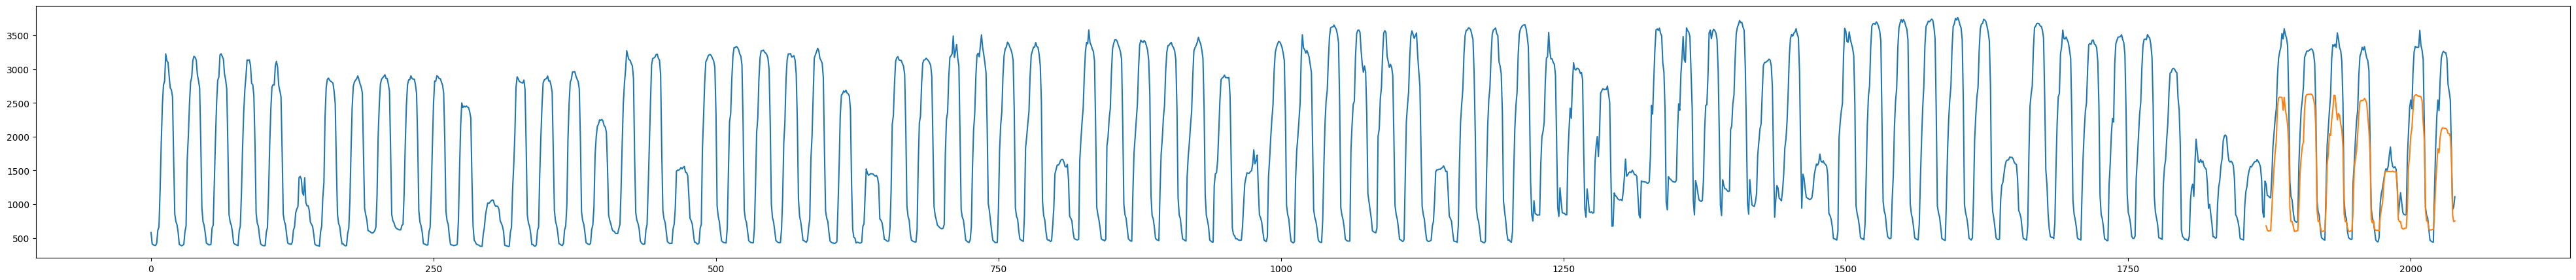

__________Buildding Number:65 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 39.930251730322574
65_____Best Iteration_____ 684 _____SMAPE Score________ 23.71895183974402
65_____Best Alpha_____ 1 _____SMAPE Score_____ 10.703781016690495
65_____SMAPE Score_____ 10.703781016690495


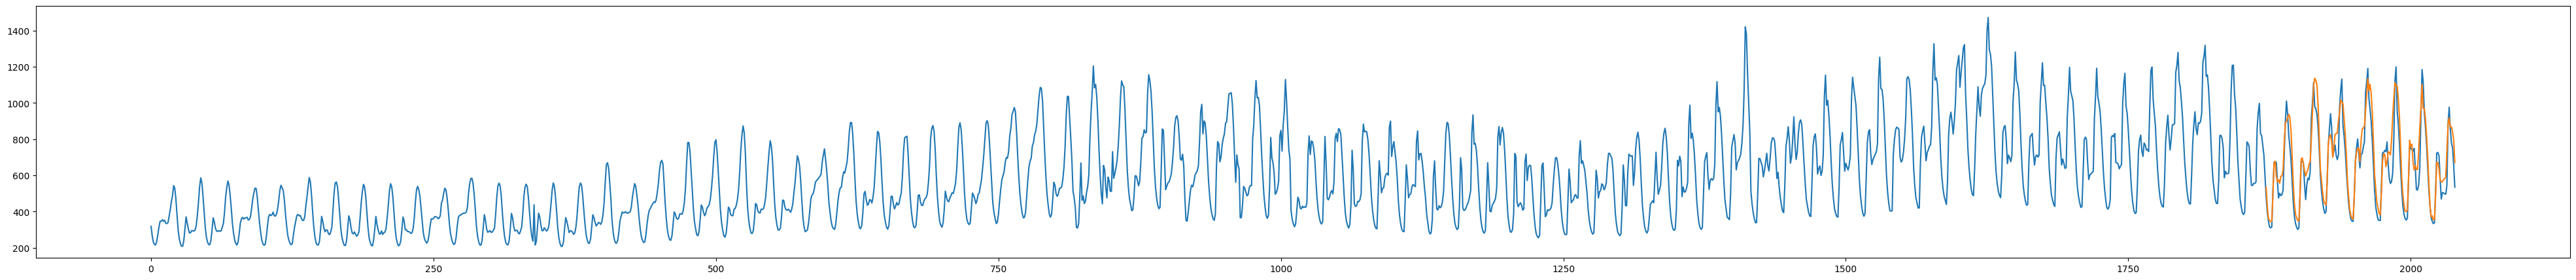

__________Buildding Number:87 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 48.37750298093389
87_____Best Iteration_____ 594 _____SMAPE Score________ 17.448222135952584
87_____Best Alpha_____ 25 _____SMAPE Score_____ 9.057884270843715
87_____SMAPE Score_____ 9.057884270843715


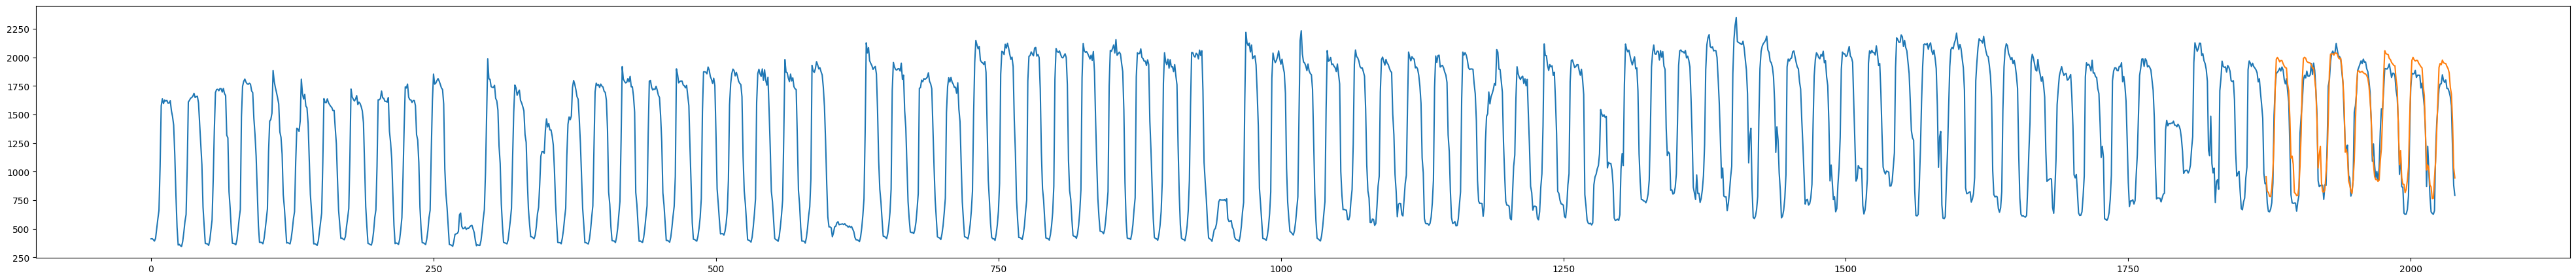

__________Buildding Number:88 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 50.58728605343312
88_____Best Iteration_____ 253 _____SMAPE Score________ 11.295623425525362
88_____Best Alpha_____ 100 _____SMAPE Score_____ 11.295623425525362
88_____SMAPE Score_____ 13.611348662119529


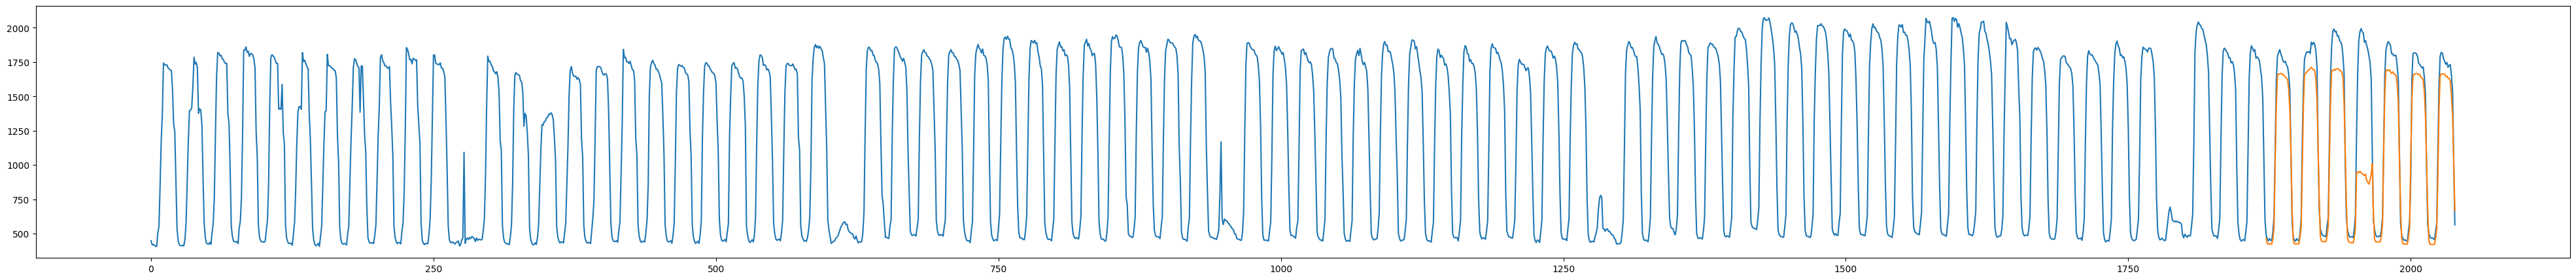

__________Buildding Number:89 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 11, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 49.259117256823835
89_____Best Iteration_____ 302 _____SMAPE Score________ 10.291111478445615
89_____Best Alpha_____ 100 _____SMAPE Score_____ 8.295851728694723
89_____SMAPE Score_____ 8.295851728694723


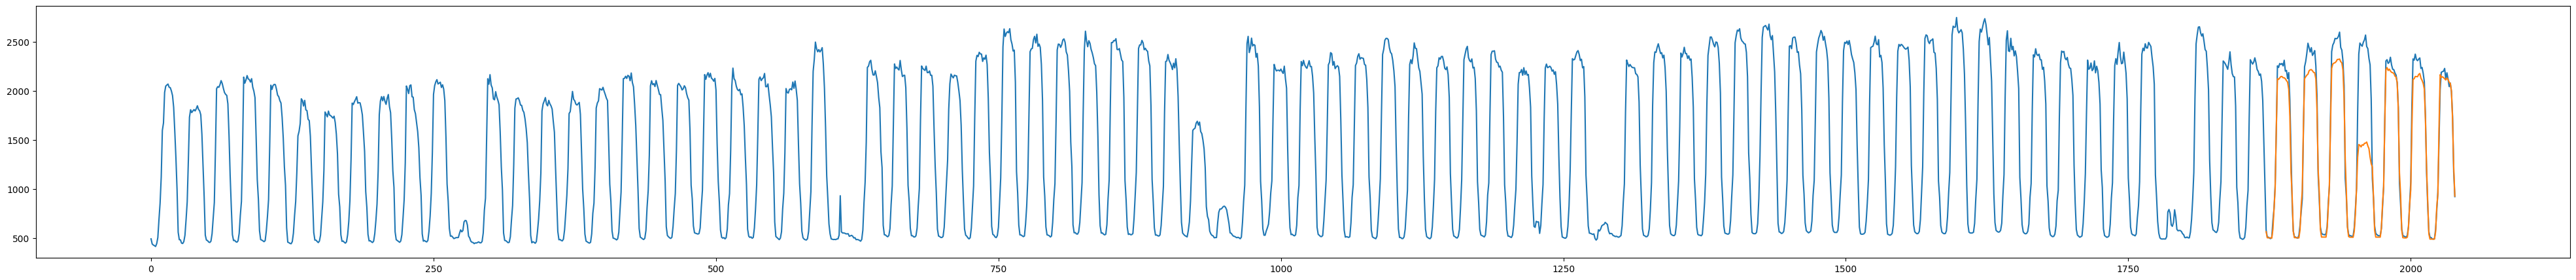

__________Buildding Number:90 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 53.42053994773463
90_____Best Iteration_____ 3119 _____SMAPE Score________ 13.899979096002356
90_____Best Alpha_____ 100 _____SMAPE Score_____ 13.899979096002356
90_____SMAPE Score_____ 18.448229384771405


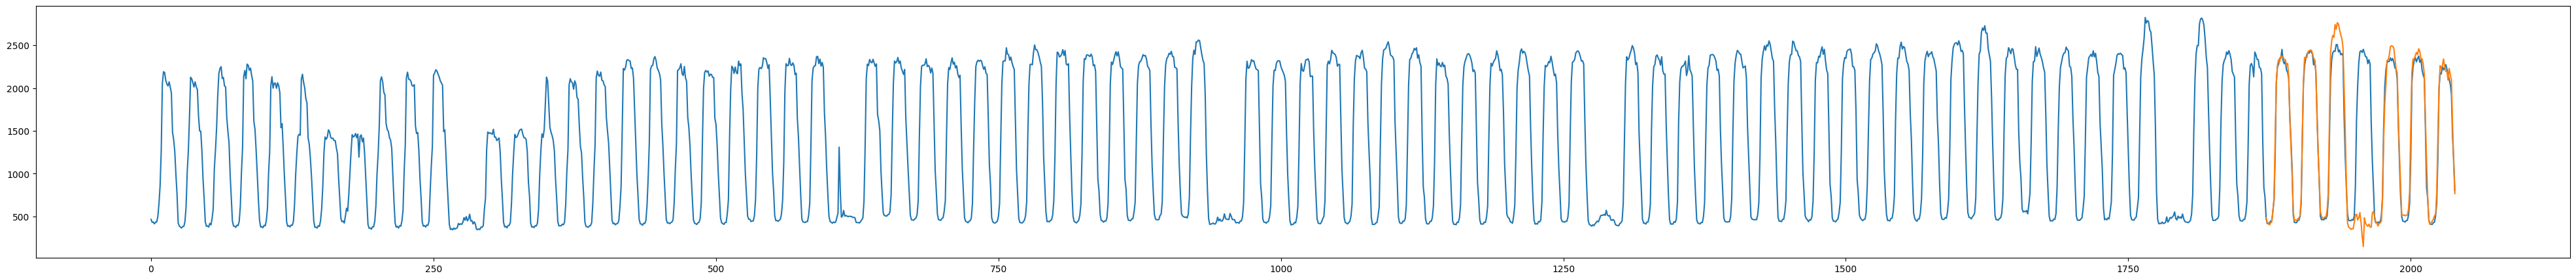

__________Buildding Number:91 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 49.255561977545355
91_____Best Iteration_____ 495 _____SMAPE Score________ 12.11852857146092
91_____Best Alpha_____ 100 _____SMAPE Score_____ 12.11852857146092
91_____SMAPE Score_____ 12.941664057438182


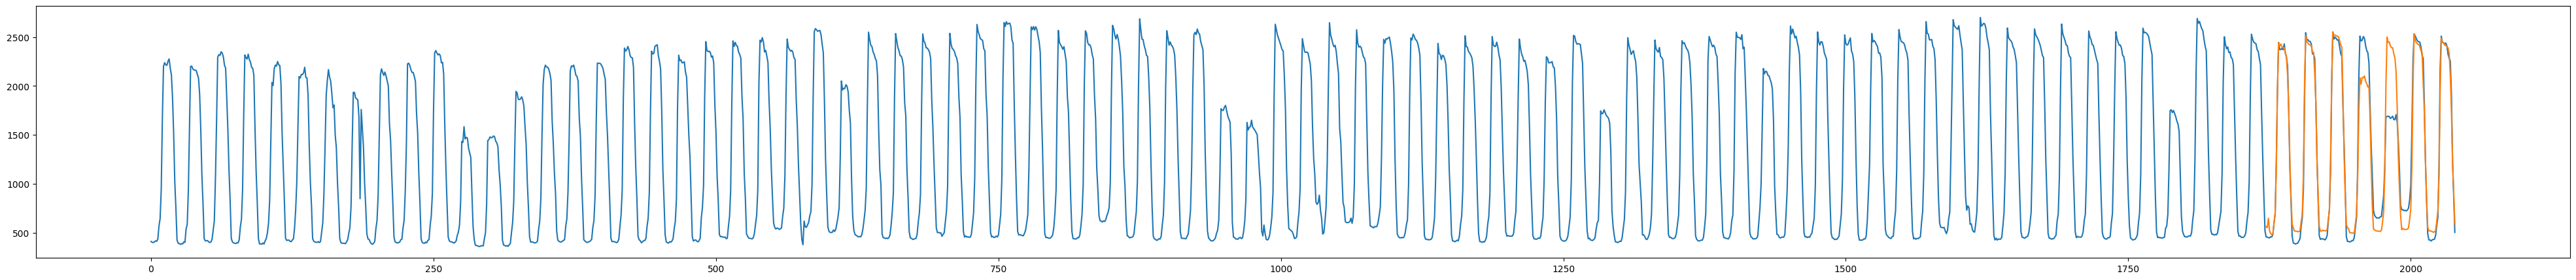

__________Buildding Number:92 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 46.83986127469494
92_____Best Iteration_____ 237 _____SMAPE Score________ 7.489429642812888
92_____Best Alpha_____ 100 _____SMAPE Score_____ 7.489429642812888
92_____SMAPE Score_____ 12.076680989344817


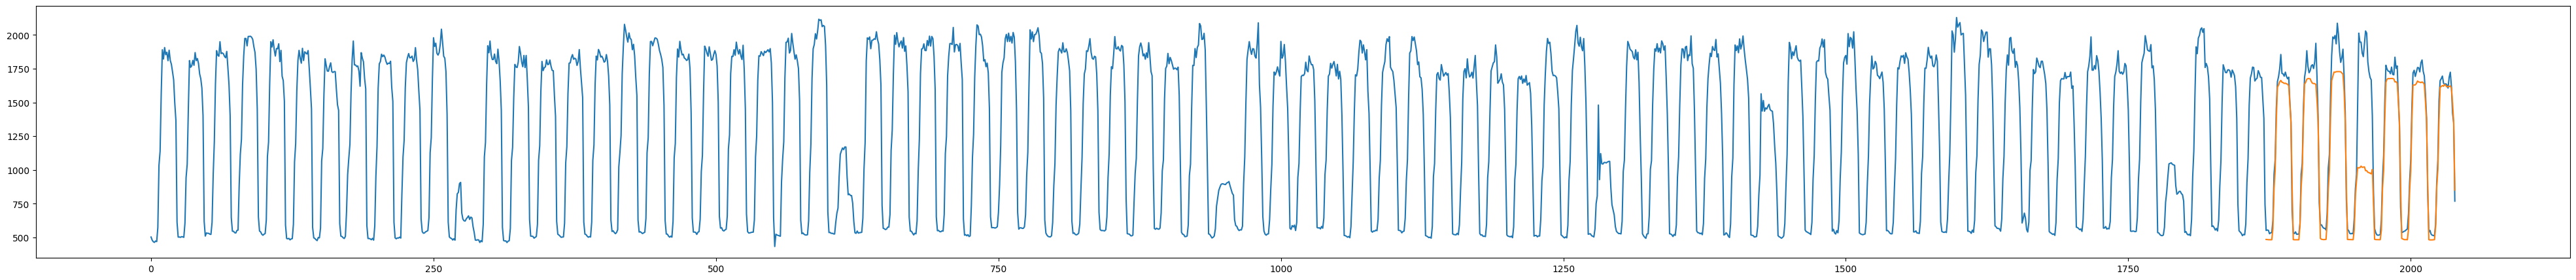

__________Buildding Number:93 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 11, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 43.947727321344615
93_____Best Iteration_____ 547 _____SMAPE Score________ 12.106249789490983
93_____Best Alpha_____ 3 _____SMAPE Score_____ 6.352202410867506
93_____SMAPE Score_____ 6.352202410867506


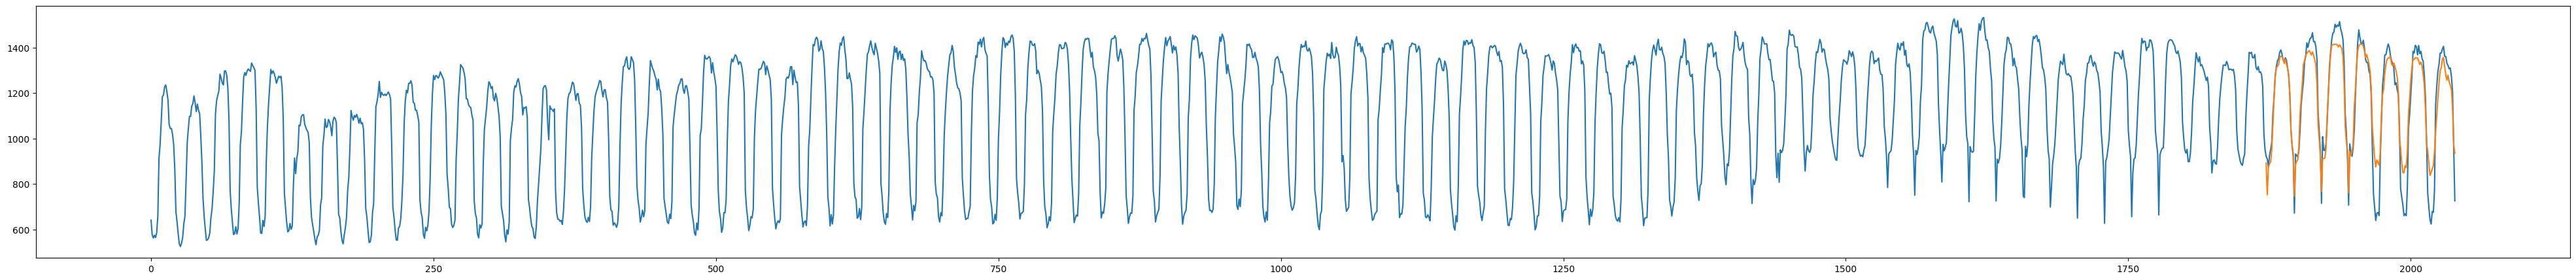

__________Buildding Number:94 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
_____SMAPE Score________ 47.95062115916461
94_____Best Iteration_____ 763 _____SMAPE Score________ 6.9086567203529645
94_____Best Alpha_____ 100 _____SMAPE Score_____ 6.9086567203529645
94_____SMAPE Score_____ 8.933586410067521


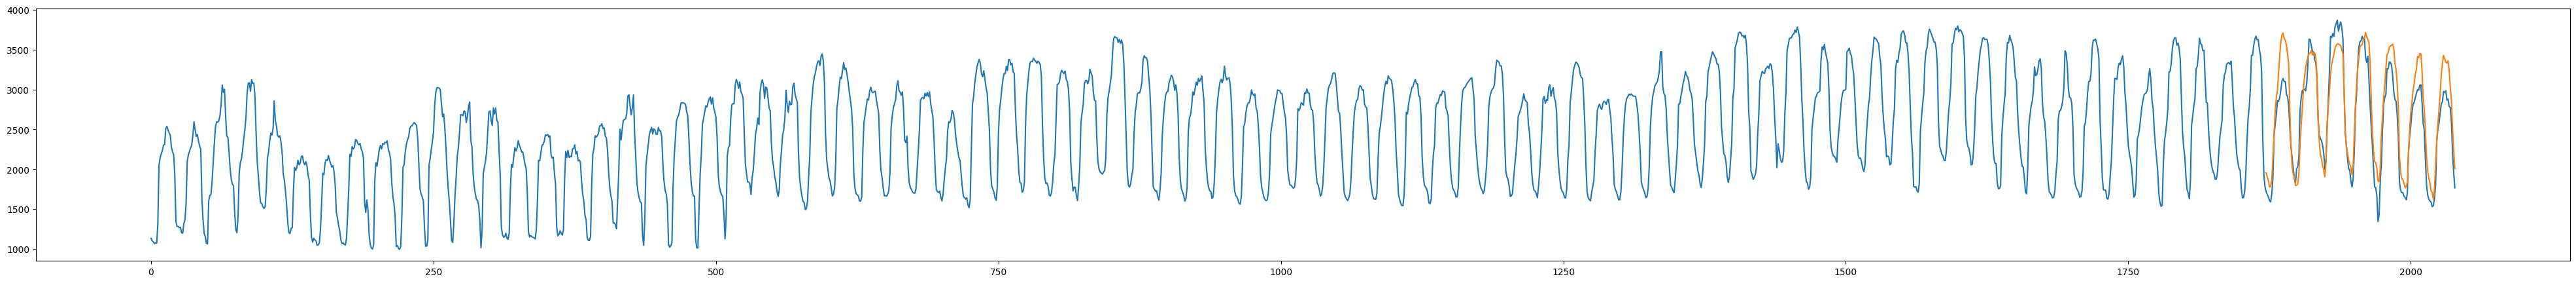

__________Buildding Number:95 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 32.81587944242546
95_____Best Iteration_____ 565 _____SMAPE Score________ 17.08063567637949
95_____Best Alpha_____ 1 _____SMAPE Score_____ 16.275741268454635
95_____SMAPE Score_____ 16.275741268454635


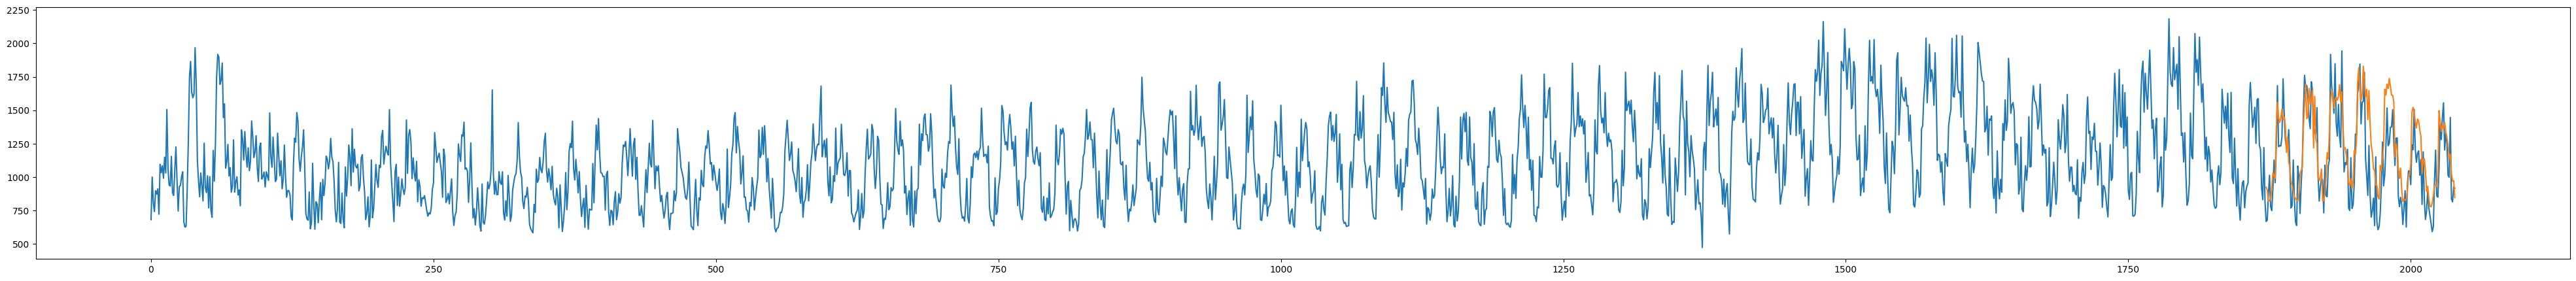

__________Buildding Number:98 Hyperparameter Tuning__________
_____Best Parameters_____ {'colsample_bytree': 0.8, 'eta': 0.01, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
_____SMAPE Score________ 37.74450062325904
98_____Best Iteration_____ 578 _____SMAPE Score________ 13.998654393148525
98_____Best Alpha_____ 1 _____SMAPE Score_____ 13.332243411195082
98_____SMAPE Score_____ 13.332243411195082


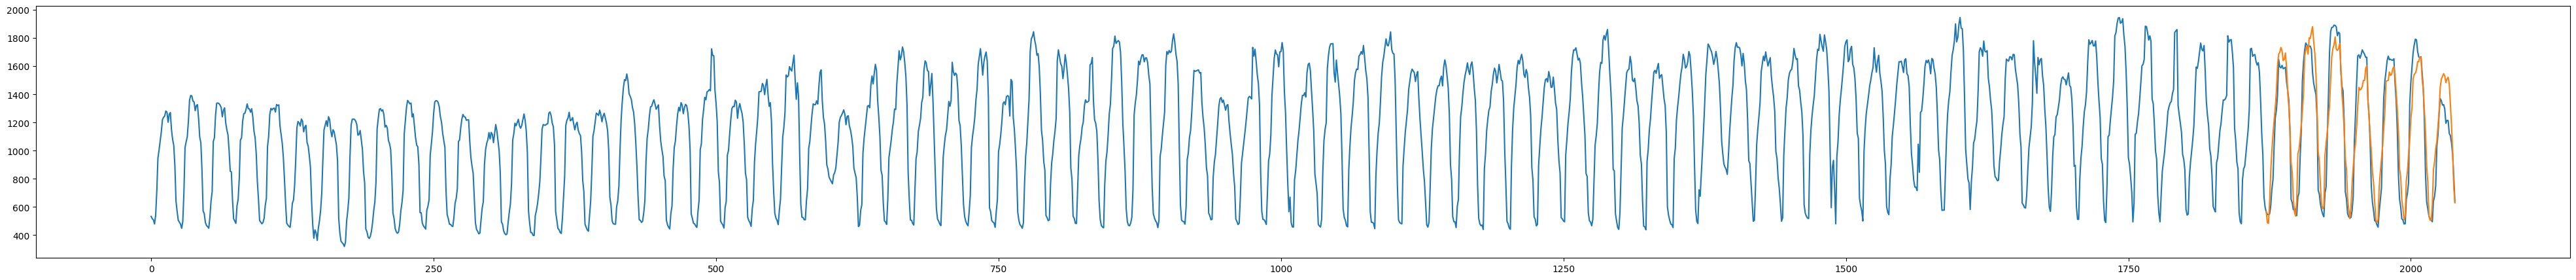

In [5]:
hyperparameters_2 = pd.DataFrame(columns = ['n_estimators', 'eta', 'min_child_weight','max_depth', 'colsample_bytree', 'subsample','lambda','gamma','alpha','best_it'])
	#추가 작업 수행
for i in index:
	train_df = pd.read_csv(f'./split/train_valid_building{i}.csv').drop(columns='Unnamed: 0')
	valid_df = pd.read_csv(f'./split/valid_building{i}.csv').drop(columns='Unnamed: 0')
	pretest_df = pd.read_csv(f'./split/pretest_building{i}.csv').drop(columns='Unnamed: 0')
	merge = pd.concat([train_df,valid_df])

	
	pretest_y = pretest_df['power_consumption']
	pretest_x = pretest_df.drop(columns=['power_consumption'])
	#####################################################################################
	percente = np.percentile(train_df['power_consumption'],1)
	#####################################################################################
	#하이퍼 파라미터 튜닝 method 1
	#leaf method
	print(f"__________Buildding Number:{i} Hyperparameter Tuning__________")
	
	preds = np.array([])
	smape_score = make_scorer(SMAPE, greater_is_better=False)
	grid = {'n_estimators' : [100], 'eta' : [0.01], 'min_child_weight' : np.arange(1, 12, 1), 'max_depth' : np.arange(3,10,1) , 'colsample_bytree' :[0.8, 0.9], 'subsample' : [0.8, 0.9]} 
	grid_under = {}
	#합병된 데이터 사용
	y = merge['power_consumption']
	x = merge.drop(columns=['power_consumption'])
	y_train, y_test, x_train, x_test = temporal_train_test_split(y = y, X = x, test_size = 168)
	#fit
	gcv = GridSearchCV(estimator = XGBRegressor(seed=42,tree_method="hist", gpu_id=0), param_grid=grid, scoring=smape_score, cv=PredefinedSplit(np.append(-np.ones(len(x)-168), np.zeros(168))) ,refit=True, verbose=False)
	gcv.fit(x, y)

	best = gcv.best_estimator_
	params = gcv.best_params_

	#pred
	x_pretest = pretest_df.drop(columns=['power_consumption'])
	y_pretest = pretest_df['power_consumption']
	pred = best.predict(x_pretest)
	print("_____Best Parameters_____",params)
	print("_____SMAPE Score________", SMAPE(y_pretest, pred))
	######################################################################################

	######################################################################################
	#n_estimators method
	x = train_df.drop(columns=['power_consumption'])
	y = train_df['power_consumption']
	valid_x = valid_df.drop(columns=['power_consumption'])
	valid_y = valid_df['power_consumption']
 
	xgb_est = XGBRegressor(tree_method="hist",  gpu_id=0,  seed = 42,
					n_estimators = 10000, eta = 0.01,
					max_depth = params['max_depth'],
					min_child_weight = params['min_child_weight'],
					colsample_bytree = params['colsample_bytree'],
					subsample = params['subsample'])
	xgb_est.set_params(**{'objective':weighted_mse(100)})
	xgb_est.fit(x, y, eval_set=[(x, y),(valid_x, valid_y)], 
			early_stopping_rounds=300, verbose=False)

	it_pred = xgb_est.predict(x_pretest)
	best_it= xgb_est.best_iteration
	socre_it = SMAPE(y_pretest, it_pred)
	params['best_it'] = best_it+1
	print(f"{i}_____Best Iteration_____", best_it+1,"_____SMAPE Score________", socre_it)
	#########################################################################################
	#Alpha method
	al_socre = socre_it
	best_alpha = 100
	y = merge['power_consumption']
	x = merge.drop(columns=['power_consumption'])
	for j in [1, 3, 5, 7, 10, 25, 50, 75, 100]:
			xgb_al = XGBRegressor(tree_method="hist",  gpu_id=0,  seed = 42,
					n_estimators = params['best_it'], eta = 0.01,
					max_depth = params['max_depth'],
					min_child_weight = params['min_child_weight'],
					colsample_bytree = params['colsample_bytree'],
					subsample = params['subsample'])
			xgb_al.set_params(**{'objective' : weighted_mse(j)})

			xgb_al.fit(x, y)
			al_pred = xgb_al.predict(x_pretest)
			score = SMAPE(y_pretest, al_pred)
			
			if score < al_socre:
				best_alpha = j
				al_socre = score
				al_best_pred = al_pred
	params['alpha'] = best_alpha
	print(f"{i}_____Best Alpha_____",best_alpha, "_____SMAPE Score_____",al_socre)
	#시각화
	xgb_final = XGBRegressor(tree_method="hist",  gpu_id=0,  seed = 42,
					n_estimators = params['best_it'], eta = 0.01,
					max_depth = params['max_depth'],
					min_child_weight = params['min_child_weight'],
					colsample_bytree = params['colsample_bytree'],
					subsample = params['subsample'])
	xgb_final.set_params(**{'objective' : weighted_mse(params['alpha'])})
	xgb_final.fit(x,y)
	final_pred = xgb_final.predict(x_pretest)
	final_score = SMAPE(y_pretest, final_pred)
	print(f"{i}_____SMAPE Score_____",final_score)
	hyperparameters_2 = pd.concat([hyperparameters_2, pd.DataFrame(params, index=[i])], axis=0)
	#y1은 합병과 pretest모두 , y2는 pretest를 pred한 결과
	y1 = pd.concat([merge,pretest_df])['power_consumption']
	y2 = final_pred
	plt.figure(figsize=(50, 5)) 
	plt.plot(np.arange(2040),y1)
	plt.plot(np.arange(2040-168, 2040) ,y2)
	plt.show()


In [2]:
xgbs = []
k = 0
hy = hyperparameters_2 
for i in index:
        
        df = pd.read_csv('./split/train_building{i}.csv').drop(columns=['Unnamed: 0'])
        test = pd.read_csv('./split/test_building{i}.csv').drop(columns=['Unnamed: 0'])
        ######################################################################
        
        ######################################################################
        x_df = df.drop(columns=['power_consumption'])
        y_df = df['power_consumption']
        xgb = XGBRegressor(tree_method="hist",  gpu_id=0,  seed = 42,
                n_estimators = hy.at[i,'best_it'], eta = 0.01,
                max_depth = hy.at[i,'max_depth'],
                min_child_weight = hy.at[i,'best_it'],
                colsample_bytree = hy.at[i,'colsample_bytree'],
                subsample = hy.at[i,'subsample'])
        xgb.set_params(**{'objective' : weighted_mse(hy.at[i,'alpha'])})
        xgb.fit(x_df, y_df)
        pred = xgb.predict(test)
        
        print(f"building_number{i}")
        plt.figure(figsize=(40, 5)) 
        plt.scatter(np.arange(2040),y_df)
        plt.scatter(np.arange(2040, 2040+168) ,pred)
        plt.show()

NameError: name 'index' is not defined

In [12]:
import xgboost as xgb
import matplotlib.pyplot as plt
# 피처 중요도 확인
feature_importances = xgb.feature_importances_
# 피처 중요도를 출력합니다.(위에서 5개만)
for i, feat_importance in enumerate(feature_importances):
  print(f"{x.columns[i]}: {feat_importance}")
# 피처 중요도를 시각화합니다.
xgb.plot_importance(xgb)
plt.show()

AttributeError: module 'xgboost' has no attribute 'feature_importances_'